# EXPLORATORY DATA ANALYSIS ('Superstore_USA.xlsx')

In [1]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Loading dataset

dataset = pd.read_excel('Superstore_USA.xlsx')

In [3]:
dataset.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [5]:
# Identifying number of rows and columns
dataset.shape

(9426, 24)

In [6]:
# Identifying number of columns with not-null values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [8]:
# Reviewing the null count of each column
dataset.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [9]:
# Filling the null values 
dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean(), inplace=True)

In [10]:
# Checking the null count after filling the null values
dataset.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

## Identifying the maximum count of order Priority

In [12]:
# Checking the count values of each order priority
dataset['Order Priority'].value_counts()

High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: Order Priority, dtype: int64

In [17]:
# Reviewing the unique value as there is duplicate values
dataset['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [18]:
# Replacing the duplicate value with original values
dataset['Order Priority']= dataset['Order Priority'].replace('Critical ', 'Critical')

In [19]:
# checking the values count of each order priority
dataset['Order Priority'].value_counts()

High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1805
Name: Order Priority, dtype: int64

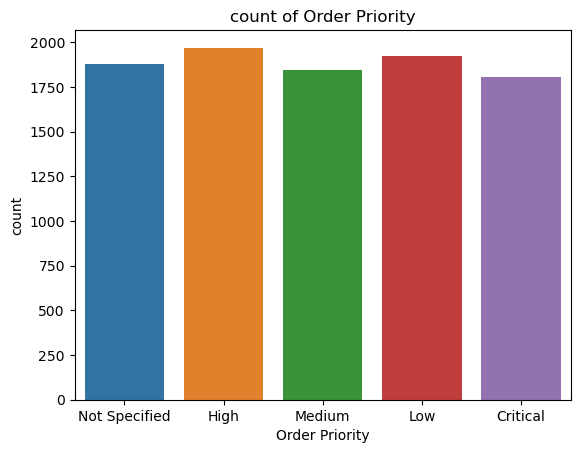

In [21]:
# Visualizing through graph
sns.countplot(x=dataset['Order Priority'])
plt.title('count of Order Priority')
plt.show()

## Identifing the maximum shipping mode

In [22]:
dataset['Ship Mode'].value_counts()

Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: Ship Mode, dtype: int64

In [24]:
# creating the x and y segment for the bar plot
x = dataset['Ship Mode'].value_counts().index
y = dataset['Ship Mode'].value_counts().values

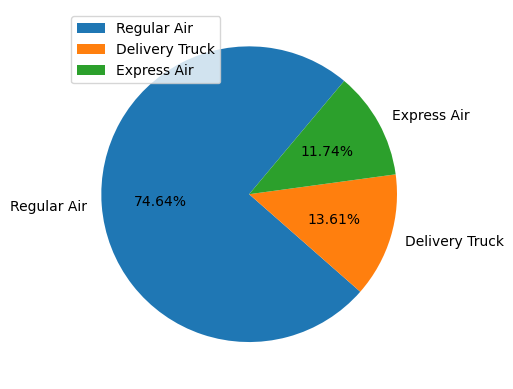

In [33]:
# visualizing the data through bar plot 
plt.pie(y, labels=x, startangle=50, autopct='%0.2f%%')
plt.legend(loc=2)
plt.show()

## Identifying which shipping mode have highest supply of the product category

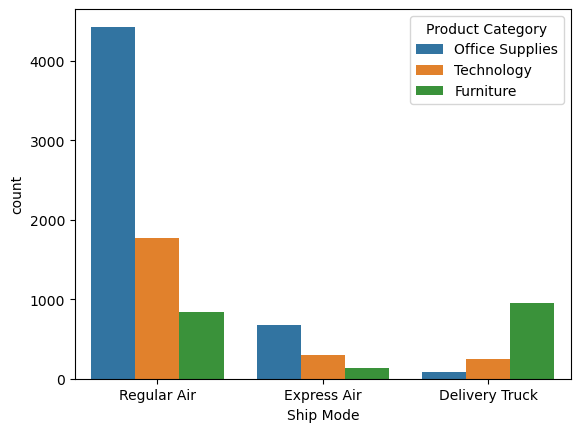

In [35]:
# Visualizing through countplot
sns.countplot(x=dataset['Ship Mode'], hue=dataset['Product Category'])
plt.show()

## Which customer segment have highest number of suppply

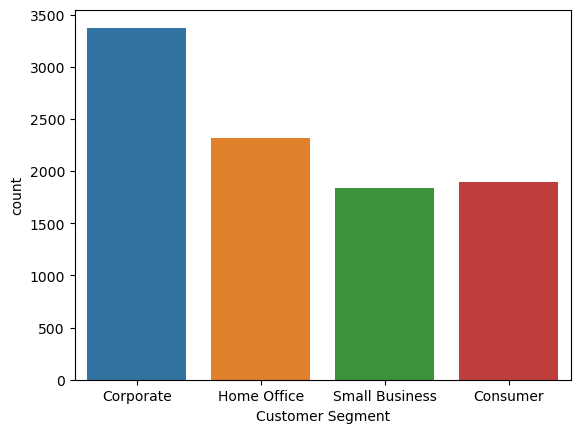

In [36]:
sns.countplot(x=dataset['Customer Segment'])
plt.show()

## which is the most demanded product category

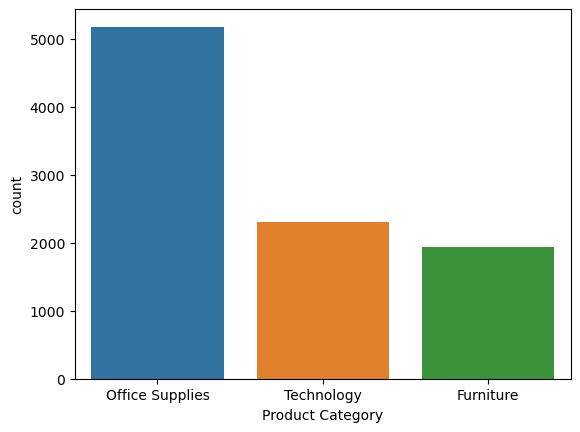

In [37]:
sns.countplot(x=dataset['Product Category'])
plt.show()

## Highest demand of sub category from the product category 'office supplies' 

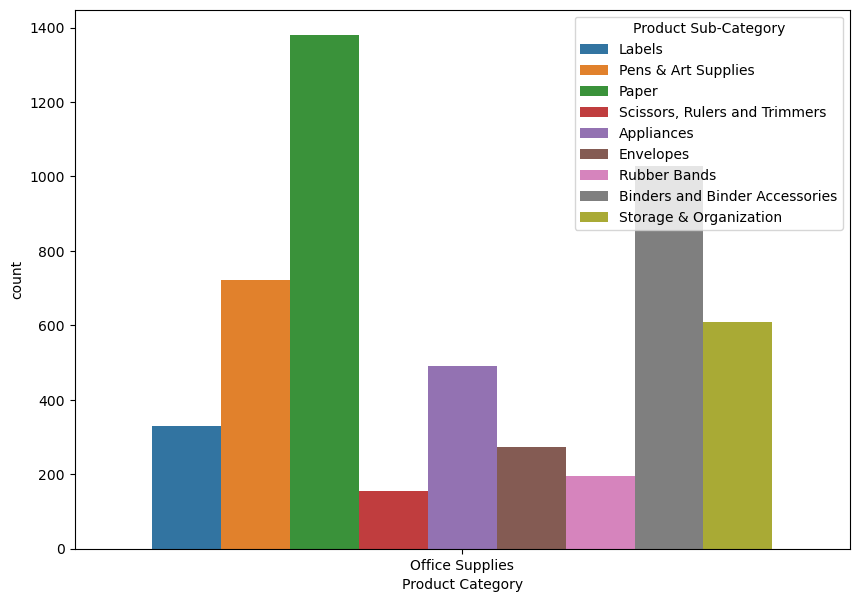

In [52]:
plt.figure(figsize=(10,7))
sns.countplot(x='Product Category', data=dataset[dataset['Product Category'] == 'Office Supplies'], hue ='Product Sub-Category')
plt.show()

## Highest demand of sub category from the product category 'Technology' 

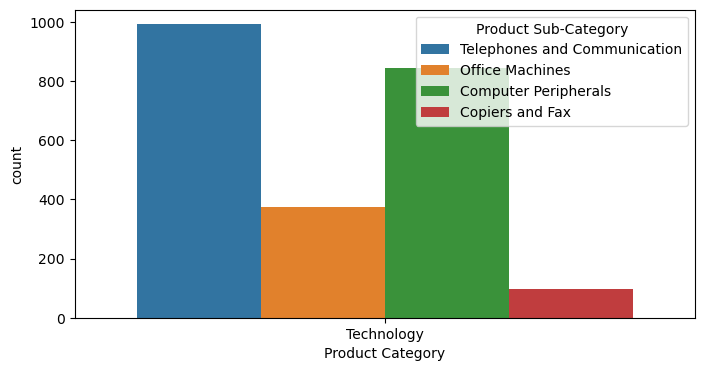

In [69]:
plt.figure(figsize=(8,4))
sns.countplot(x='Product Category', data=dataset[dataset['Product Category'] == 'Technology'], hue ='Product Sub-Category')
plt.show()

## Highest demand of sub category from the product category 'Furniture' 

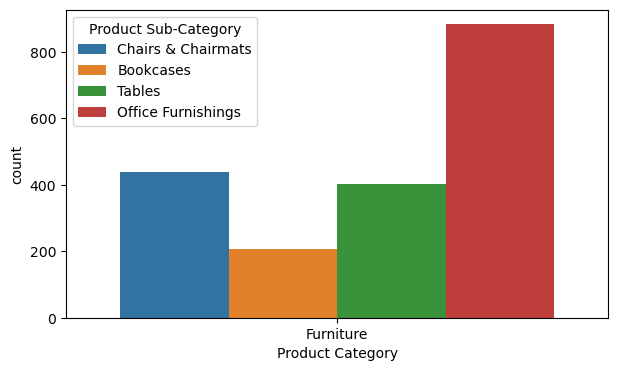

In [56]:
plt.figure(figsize=(7,4))
sns.countplot(x='Product Category', data=dataset[dataset['Product Category'] == 'Furniture'], hue ='Product Sub-Category')
plt.show()

## Identify which year has done maximum supply

In [74]:
# extracting the year from the order date
dataset['Order Date'].dt.year

0       2012
1       2010
2       2011
3       2011
4       2011
        ... 
9421    2013
9422    2013
9423    2013
9424    2010
9425    2013
Name: Order Date, Length: 9426, dtype: int64

In [75]:
# Creating another column order year to store only year values
dataset['Order Year'] = dataset['Order Date'].dt.year

In [76]:
dataset.head(2)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Order Year
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525,2012
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522,2010


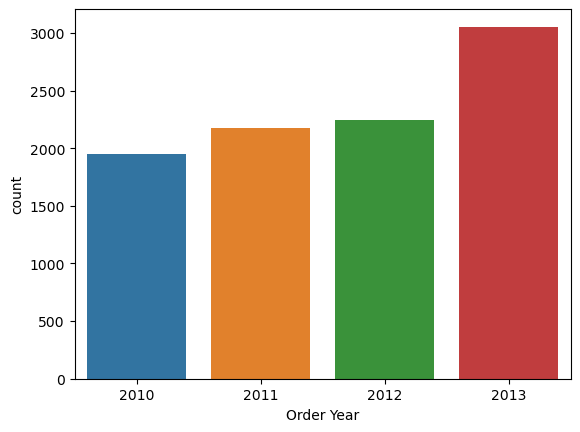

In [83]:
# using countplot to visualize the year which receive maximum order
sns.countplot(x='Order Year', data=dataset)
plt.show()

## Find the category which has done maximum profit

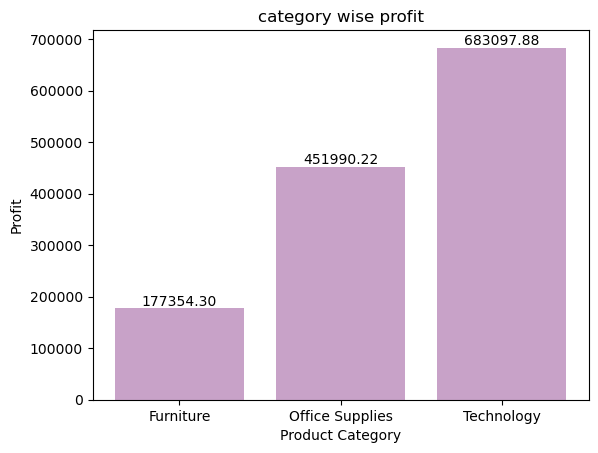

In [90]:
grouped_data = dataset.groupby('Product Category')['Profit'].sum()
data = pd.DataFrame({'Profit' : grouped_data})
plt.bar(data.index, data['Profit'], color='#C8A2C8')
plt.xlabel('Product Category')
plt.ylabel('Profit')
plt.title('category wise profit')

for index, value in enumerate(data['Profit']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
    
plt.show()

## Which state or provience has done maximum amount of sales

In [91]:
dataset.head(2)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Order Year
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525,2012
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522,2010


In [111]:
# extracting top 5 state with maximum order
dataset['State or Province'].value_counts()[:5]

California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: State or Province, dtype: int64

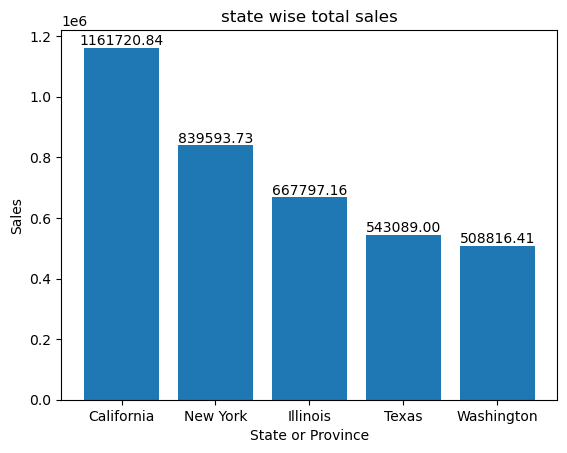

In [109]:
#  visualizing top 5 state with maximum number of sales through bar graph
grouped_value = dataset.groupby('State or Province')['Sales'].sum().sort_values(ascending=False).head(5)
value = pd.DataFrame({'Sales' : grouped_value})
plt.bar(value.index, value['Sales'])
plt.xlabel('State or Province')
plt.ylabel('Sales')
plt.title('state wise total sales')

for index, value in enumerate(value['Sales']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
    
plt.show()

## Identify which product category has done maximum margin

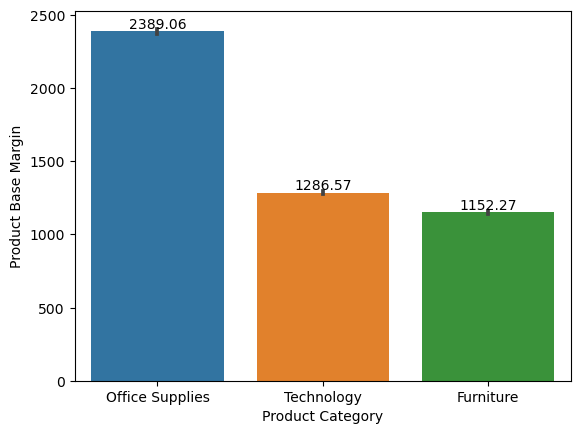

In [115]:
# visualization of product base margin of each product category through seaborn
sns.barplot(x='Product Category', y='Product Base Margin', data=dataset, estimator=sum)
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.show()

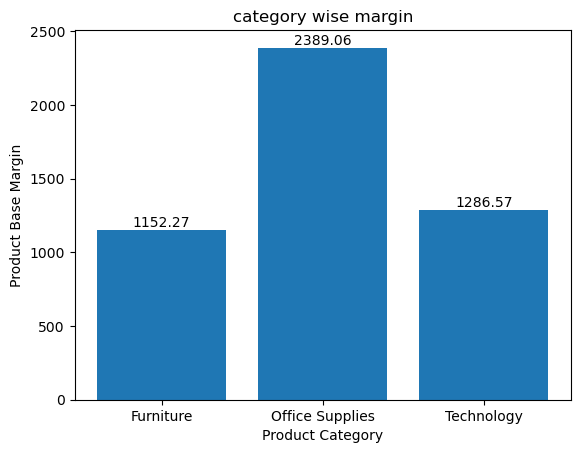

In [116]:
# visualization of product base margin of each product category through matplotlib
grouped_value = dataset.groupby('Product Category')['Product Base Margin'].sum()
value = pd.DataFrame({'Product Base Margin' : grouped_value})
plt.bar(value.index, value['Product Base Margin'])
plt.xlabel('Product Category')
plt.ylabel('Product Base Margin')
plt.title('category wise margin')

for index, value in enumerate(value['Product Base Margin']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
    
plt.show()